<a href="https://colab.research.google.com/github/ImSouritra/Deep-Learning-and-Neural-Networks/blob/master/Sea%20Animals%20Classification/Sea_Animals_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea Animals Image Dataset

**Overview:**
Most life forms began their evolution in aquatic environments. About 90% of the world's living space is provided by the oceans in terms of volume. Fish, which are only found in water, are the first known vertebrates. Some of these transformed into amphibians, which dwell both on land and in water for parts of the day. A few subgroups of one group of amphibians, which also included sea turtles, seals, manatees, and whales, developed into reptiles and mammals. Some underwater habitats are supported by plant life that grows in the water, such as kelp and other algae. The base of the ocean food chain is made up primarily of phytoplankton, which are important primary producers.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**About the Dataset:**
The dataset contains different images of marine animals. Some images were taken from pixabay.com and requires no license or attribution when used. Other images were taken from flickr.com where attribution to the original authors will be required when used commercially. Currently, there are 19 different classes available and may be extended further in the future. The images are resized to either (300px, n) or (n,300px) where n is a pixel size less than 300px. 

In [1]:
!wget https://raw.githubusercontent.com/ImSouritra/Deep-Learning-and-Neural-Networks/master/helper_functions.py

--2022-10-22 04:14:25--  https://raw.githubusercontent.com/ImSouritra/Deep-Learning-and-Neural-Networks/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7705 (7.5K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   7.52K  --.-KB/s    in 0s      

2022-10-22 04:14:25 (80.7 MB/s) - ‘helper_functions.py’ saved [7705/7705]



In [2]:
%pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 7.8 MB/s 


In [61]:
import os
import pathlib
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
import visualkeras

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import efficientnet_v2
from tensorflow.keras import Sequential, layers
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

from helper_functions import *

In [4]:
os.mkdir("sea_animals")

## Getting the data
Getting the zipfile from which was uploaded into my google drive and unzipping it

In [5]:
file_ref = zipfile.ZipFile("/content/drive/MyDrive/archive (3).zip")
file_ref.extractall(path="/content/sea_animals")
file_ref.close()

In [6]:
# Viewing how many images we are dealing with and how many classes they belong to
for dir_path, dir_name , filename in os.walk("/content/sea_animals"):
        print(f"There are {len(dir_path)} directories and {len(filename)} images in {dir_path}") 

There are 20 directories and 0 images in /content/sea_animals
There are 36 directories and 1903 images in /content/sea_animals/Turtle_Tortoise
There are 26 directories and 499 images in /content/sea_animals/Crabs
There are 29 directories and 517 images in /content/sea_animals/Sea Rays
There are 26 directories and 572 images in /content/sea_animals/Whale
There are 28 directories and 499 images in /content/sea_animals/Lobster
There are 24 directories and 497 images in /content/sea_animals/Eel
There are 28 directories and 531 images in /content/sea_animals/Puffers
There are 31 directories and 855 images in /content/sea_animals/Jelly Fish
There are 32 directories and 579 images in /content/sea_animals/Sea Urchins
There are 26 directories and 483 images in /content/sea_animals/Squid
There are 25 directories and 414 images in /content/sea_animals/Seal
There are 29 directories and 478 images in /content/sea_animals/Seahorse
There are 28 directories and 482 images in /content/sea_animals/Pengu

## Visualizing images

In [7]:
class_names = np.array(sorted(os.listdir("sea_animals")))
len(class_names)

19

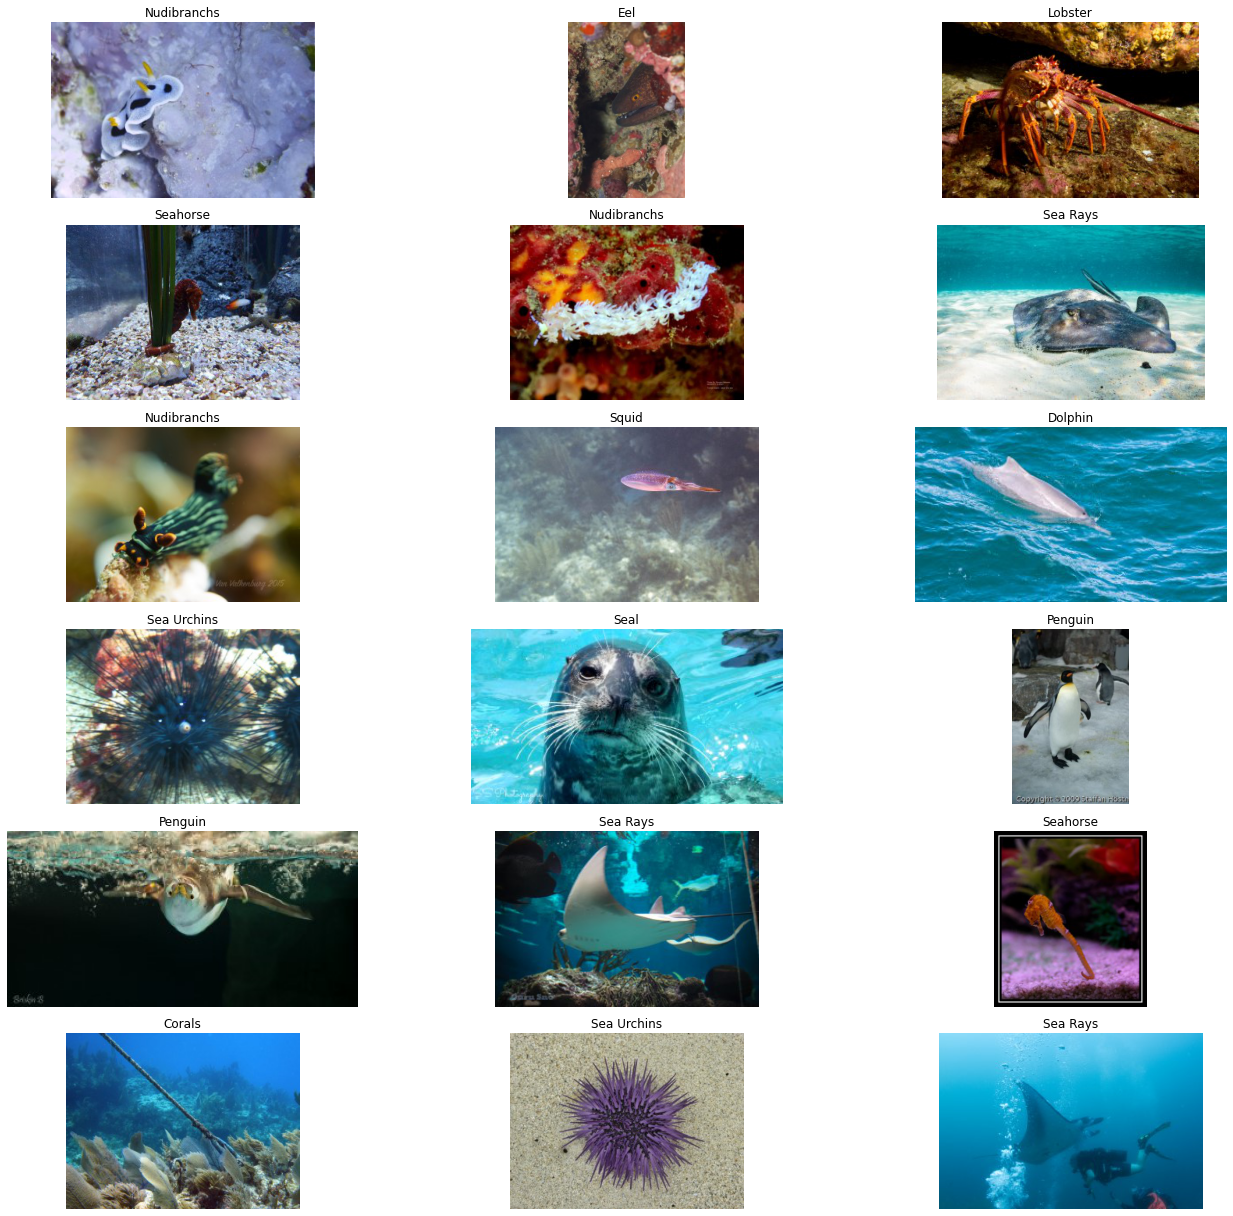

In [8]:
plt.figure(figsize=(20,17))
for i in range(18):
  random_class = random.choice(class_names)
  image_name = random.choice(os.listdir("sea_animals"+"/"+random_class))
  filepath = "sea_animals" + "/" + random_class +"/" + image_name
  image = mpimg.imread(filepath)
  plt.subplot(6,3,i+1)
  plt.imshow(image)
  plt.title(random_class)
  plt.axis("off")
plt.tight_layout()  

## Splitting the dataset 
we are gonna split the data into train, valid and test split. Train split for training the model , valid split for validation and test data for evaluation of our final model

In [9]:
# This function is imported from my github with helper_functions
make_train_test_split(root_dir = "sea_animals/", class_names = class_names)

sea_animals/Corals
Total images  : Corals 500
Training : Corals 375
Validation : Corals 100
Testing : Corals 25
sea_animals/Crabs
Total images  : Crabs 499
Training : Crabs 374
Validation : Crabs 100
Testing : Crabs 25
sea_animals/Dolphin
Total images  : Dolphin 782
Training : Dolphin 586
Validation : Dolphin 156
Testing : Dolphin 40
sea_animals/Eel
Total images  : Eel 497
Training : Eel 372
Validation : Eel 100
Testing : Eel 25
sea_animals/Jelly Fish
Total images  : Jelly Fish 855
Training : Jelly Fish 641
Validation : Jelly Fish 171
Testing : Jelly Fish 43
sea_animals/Lobster
Total images  : Lobster 499
Training : Lobster 374
Validation : Lobster 100
Testing : Lobster 25
sea_animals/Nudibranchs
Total images  : Nudibranchs 500
Training : Nudibranchs 375
Validation : Nudibranchs 100
Testing : Nudibranchs 25
sea_animals/Octopus
Total images  : Octopus 562
Training : Octopus 421
Validation : Octopus 112
Testing : Octopus 29
sea_animals/Penguin
Total images  : Penguin 482
Training : Pengu

In [10]:
train_dir = "/content/sea_animals/train"
valid_dir = "/content/sea_animals/val"
test_dir = "/content/sea_animals/test"

train_data = image_dataset_from_directory(train_dir,
                                          label_mode="categorical",
                                          shuffle=True,
                                          image_size=(224,224),
                                          batch_size=32,
                                          seed=42,
                                          )

valid_data = image_dataset_from_directory(valid_dir,
                                          label_mode="categorical",
                                          shuffle=True, # We are not 
                                          image_size=(224,224),
                                          batch_size=32,
                                          seed=42)

test_data = image_dataset_from_directory(test_dir,
                                         label_mode = "categorical",
                                         shuffle=False, ## We won't shuffle the test data for final evaluation
                                         image_size=(224,224),
                                         batch_size=32)



Found 8800 files belonging to 19 classes.
Found 2348 files belonging to 19 classes.
Found 594 files belonging to 19 classes.


In [ ]:
len(train_data), len(valid_data), len(test_data)

(275, 74, 19)

## Building a Feature Extraction Model

We will build our first feature extraction model from keras functional API and we'll use the EfficientNet_v2_B0 architecture doing so. All the layers of the feature extraction model will be frozen.

In [11]:
base_model = efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False

inputs = layers.Input(shape=(224,224,3),name="input_layer")
x = base_model(inputs)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(units=len(class_names),activation="softmax",name="output_layer")(x)
model_1 = tf.keras.Model(inputs,outputs)
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])



24274472/24274472 [==============================] - 1s 0us/step


In [12]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 19)                24339     
                                                                 
Total params: 5,943,651
Trainable params: 24,339
Non-trainable params: 5,919,312
_________________________________________________________________


In [13]:
initial_epochs=5
history_1 = model_1.fit(train_data, epochs=initial_epochs, steps_per_epoch = len(train_data), validation_data=valid_data,validation_steps = len(valid_data),callbacks=[create_tensorboard_callback("logs","model_1")])

Creating tensorboard log file in logs/model_12022$m$d-041518
Epoch 1/5
275/275 [==============================] - 39s 83ms/step - loss: 0.8626 - accuracy: 0.7852 - val_loss: 0.5338 - val_accuracy: 0.8467
Epoch 2/5
275/275 [==============================] - 22s 80ms/step - loss: 0.4613 - accuracy: 0.8636 - val_loss: 0.4724 - val_accuracy: 0.8620
Epoch 3/5
275/275 [==============================] - 23s 82ms/step - loss: 0.3951 - accuracy: 0.8805 - val_loss: 0.4500 - val_accuracy: 0.8637
Epoch 4/5
275/275 [==============================] - 21s 76ms/step - loss: 0.3605 - accuracy: 0.8936 - val_loss: 0.4370 - val_accuracy: 0.8667
Epoch 5/5
275/275 [==============================] - 22s 80ms/step - loss: 0.3300 - accuracy: 0.9023 - val_loss: 0.4296 - val_accuracy: 0.8714


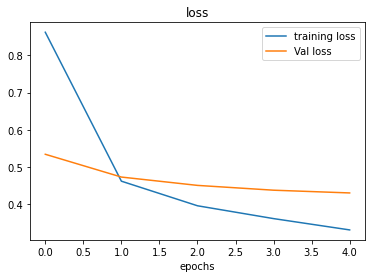

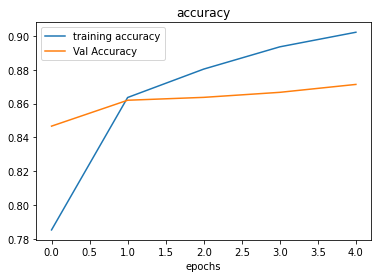

In [14]:
plot_loss_curves(history_1)

In [15]:
model_1_results = model_1.evaluate(valid_data)

74/74 [==============================] - 5s 60ms/step - loss: 0.4296 - accuracy: 0.8714


## Model Checkpoint Callback

In [16]:
checkpoint_path = "model_checkpoints/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         monitor="val_acc",
                                                         save_best_only=True,
                                                         save_weights_only=True,
                                                         verbose=1)


## Building a Data Augmentation Layer

In [17]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomHeight(0.3),
    layers.RandomWidth(0.3),
    layers.RandomRotation(0.4),
    layers.RandomZoom(0.3),
    layers.RandomBrightness(0.2)
],name="data_augmentation_layer")

In [18]:
base_model = efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False

inputs = layers.Input(shape=(224,224,3),name="input_layer")
x = data_augmentation(inputs)
x = base_model(x)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(units=len(class_names),activation="softmax",name="output_layer")(x)
model_2 = tf.keras.Model(inputs,outputs)


In [19]:
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, 224, 224, 3)      0         
 quential)                                                       
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 19)                24339     
                                                           

In [20]:
history_2 = model_2.fit(train_data,epochs=initial_epochs,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data),callbacks=[create_tensorboard_callback("logs","model_2"),checkpoint_callback])

Creating tensorboard log file in logs/model_22022$m$d-041822
Epoch 1/5


275/275 [==============================] - ETA: 0s - loss: 1.3268 - accuracy: 0.6251

275/275 [==============================] - 144s 493ms/step - loss: 1.3268 - accuracy: 0.6251 - val_loss: 0.6913 - val_accuracy: 0.8024
Epoch 2/5
275/275 [==============================] - ETA: 0s - loss: 0.8897 - accuracy: 0.7286

275/275 [==============================] - 106s 386ms/step - loss: 0.8897 - accuracy: 0.7286 - val_loss: 0.5904 - val_accuracy: 0.8224
Epoch 3/5
275/275 [==============================] - ETA: 0s - loss: 0.8152 - accuracy: 0.7502

275/275 [==============================] - 101s 367ms/step - loss: 0.8152 - accuracy: 0.7502 - val_loss: 0.5568 - val_accuracy: 0.8313
Epoch 4/5
275/275 [==============================] - ETA: 0s - loss: 0.7867 - accuracy: 0.7545

275/275 [==============================] - 87s 316ms/step - loss: 0.7867 - accuracy: 0.7545 - val_loss: 0.5403 - val_accuracy: 0.8330
Epoch 5/5
275/275 [==============================] - ETA: 0s - loss: 0.7593 - accuracy: 0.7631

275/275 [==============================] - 85s 310ms/step - loss: 0.7593 - accuracy: 0.7631 - val_loss: 0.5202 - val_accuracy: 0.8394


Okay so our validation accuracy decreased by 4% after adding the data augmentation layer.
 

## Fine Tuning Model 2
We are gonna unfreeze some of the layers of model_2 and make it trainable

In [21]:
for i, layer in enumerate(model_2.layers):
  print(i, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation_layer True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


In [22]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [23]:
base_model.trainable=True

for layer in base_model.layers[:-10]:
  layer.trainable=False
  

In [24]:
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [25]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [26]:
history_2_fine_tuned = model_2.fit(train_data,epochs=initial_epochs+5,initial_epoch = history_2.epoch[-1],steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data),callbacks=[create_tensorboard_callback("logs","model_2_fine_tuned")])

Creating tensorboard log file in logs/model_2_fine_tuned2022$m$d-042803
Epoch 5/10


275/275 [==============================] - 95s 310ms/step - loss: 0.7959 - accuracy: 0.7520 - val_loss: 0.4986 - val_accuracy: 0.8539
Epoch 6/10
275/275 [==============================] - 76s 276ms/step - loss: 0.6810 - accuracy: 0.7843 - val_loss: 0.5025 - val_accuracy: 0.8535
Epoch 7/10
275/275 [==============================] - 72s 259ms/step - loss: 0.6206 - accuracy: 0.8024 - val_loss: 0.4621 - val_accuracy: 0.8646
Epoch 8/10
275/275 [==============================] - 71s 257ms/step - loss: 0.5852 - accuracy: 0.8122 - val_loss: 0.4643 - val_accuracy: 0.8697
Epoch 9/10
275/275 [==============================] - 71s 259ms/step - loss: 0.5647 - accuracy: 0.8195 - val_loss: 0.4827 - val_accuracy: 0.8595
Epoch 10/10
275/275 [==============================] - 69s 251ms/step - loss: 0.5334 - accuracy: 0.8278 - val_loss: 0.4487 - val_accuracy: 0.8693


In [27]:
model_2.save("/content/drive/MyDrive/model_2_sea_animals_fine_tuned.h5")

In [28]:
model_1.evaluate(test_data), model_2.evaluate(test_data)

19/19 [==============================] - 1s 62ms/step - loss: 0.5037 - accuracy: 0.8670


([0.44896090030670166, 0.8585858345031738],
 [0.5036728382110596, 0.8670033812522888])

We've not achieved the results we hoped for, but let's evaluate our current model

In [46]:
fine_tuned_model = tf.keras.models.load_model("/content/drive/MyDrive/model_2_sea_animals_fine_tuned.h5")
fine_tuned_model.evaluate(test_data)

19/19 [==============================] - 3s 67ms/step - loss: 0.5037 - accuracy: 0.8670


[0.5036728382110596, 0.8670033812522888]

## Evaluate The Fine Tuned Model

In [47]:
pred_probs = fine_tuned_model.predict(test_data)
pred_probs

19/19 [==============================] - 3s 63ms/step


array([[8.5048124e-02, 5.8672554e-04, 1.9521469e-03, ..., 2.0456286e-04,
        2.5440627e-03, 5.8959383e-03],
       [8.8837266e-01, 2.2170820e-05, 2.0181363e-04, ..., 2.6565760e-05,
        5.2140874e-04, 5.9863843e-05],
       [3.3877826e-01, 2.0923206e-04, 3.0194715e-04, ..., 4.4101569e-05,
        8.5258717e-03, 4.8007565e-03],
       ...,
       [8.3713152e-05, 1.6414767e-04, 5.9993933e-03, ..., 2.7173263e-04,
        3.4252854e-04, 9.8534322e-01],
       [4.4869953e-06, 1.5676103e-06, 8.0351373e-03, ..., 3.6625668e-06,
        2.2758012e-04, 9.9140161e-01],
       [2.8979432e-04, 3.3999421e-03, 2.9010901e-01, ..., 9.7294236e-05,
        1.6517315e-02, 6.3819665e-01]], dtype=float32)

In [49]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes

array([ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  7,
        0,  0,  9,  0,  7,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 13,  2,  2,  2,  2,
        2,  2,  2,  2,  2, 18,  2,  2,  2,  2,  2,  2,  2,  2, 10,  2,  2,
       18, 17, 18,  2, 18,  6,  3,  7,  9,  3, 13,  3,  3,  3,  9,  3,  3,
        9,  3,  9,  0,  3,  3,  3,  7,  9,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4, 14,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  5,  5,  0,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  9,  6,  6, 15,  6,  6,  6,
        6,  6,  6,  9,  5,  7,  0,  7,  0,  7,  6,  7,  7,  7,  7,  0,  7,
        7,  7,  7,  5,  7

In [53]:
y_labels = []

for images,labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]  

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [54]:
accuracy_fine_tuned =  accuracy_score(y_labels, pred_classes)
accuracy_fine_tuned

0.867003367003367

In [56]:
precision_fine_tuned = precision_score(y_labels, pred_classes,average="micro")
precision_fine_tuned

0.867003367003367

In [57]:
import itertools
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.
  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Change plot x_label vertical
  plt.xticks(rotation=70,fontsize=text_size)
  plt.yticks(fontsize=text_size) 

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

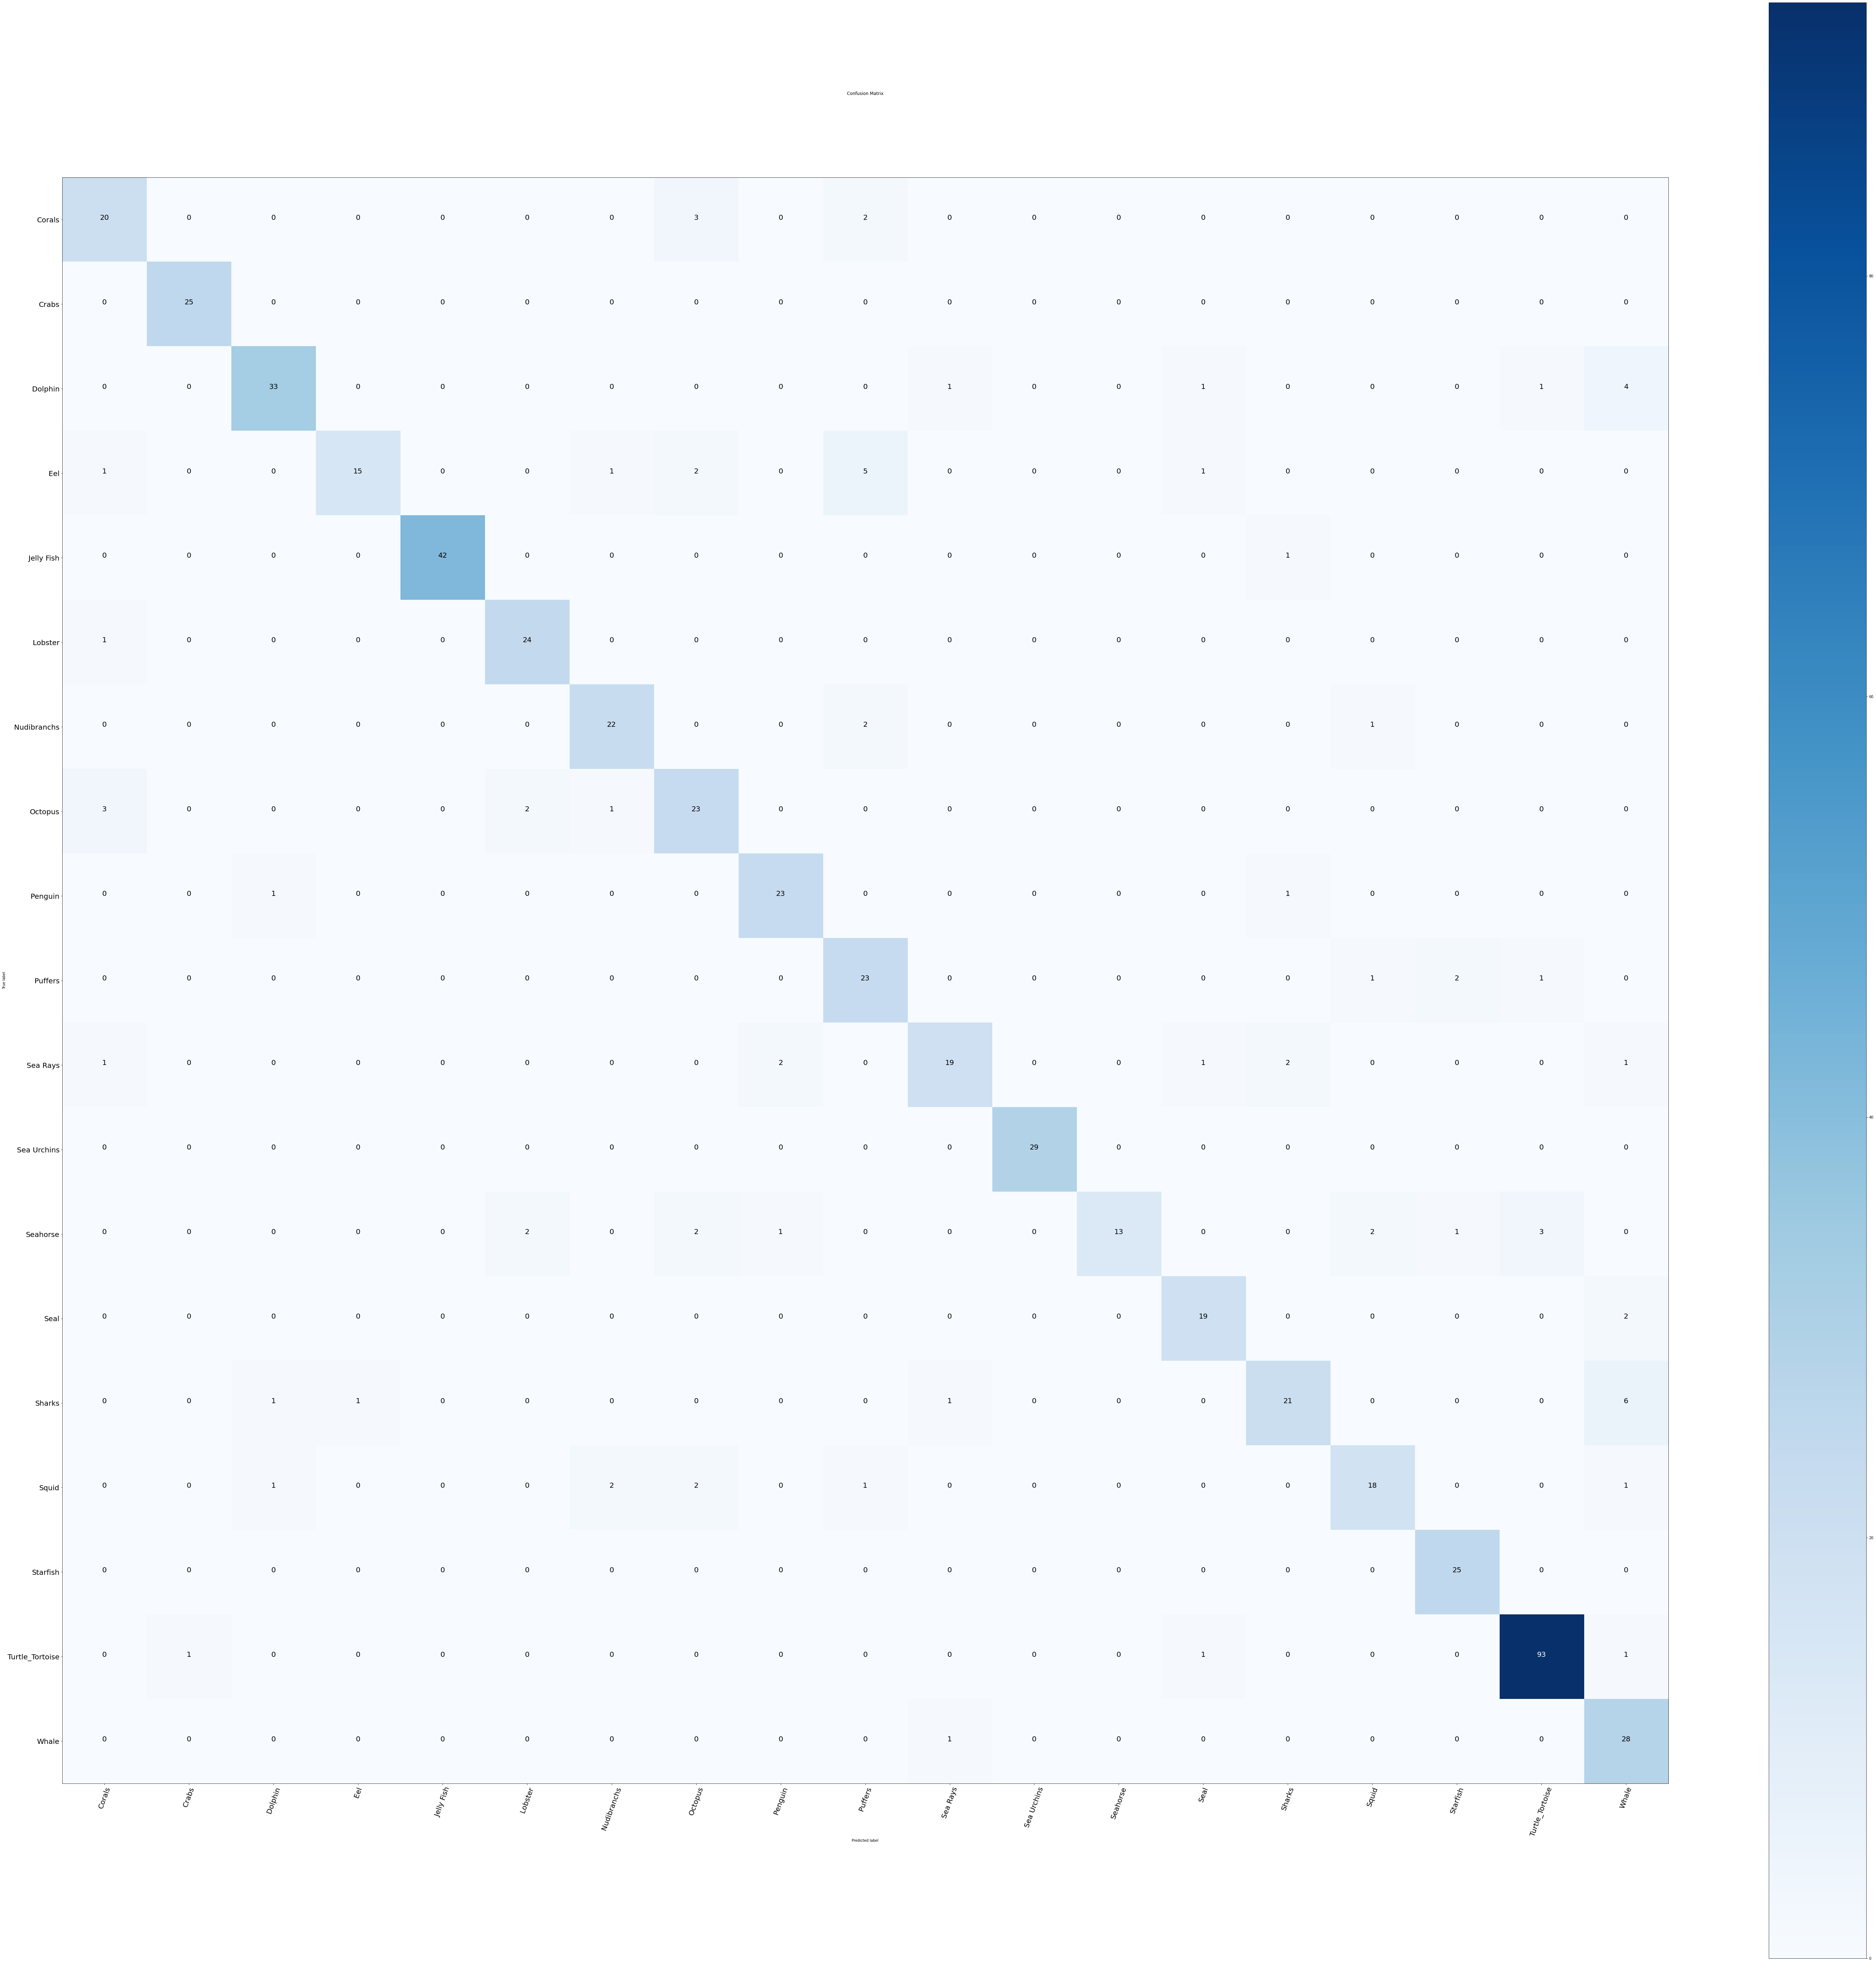

In [58]:
make_confusion_matrix(y_labels, pred_classes, classes=train_data.class_names,figsize=(100,100),text_size=20)

In [62]:
# Let's plot all our F1 scores

classification_dict = classification_report(y_labels, pred_classes,output_dict=True)
classification_dict

{'0': {'precision': 0.7692307692307693,
  'recall': 0.8,
  'f1-score': 0.7843137254901961,
  'support': 25},
 '1': {'precision': 0.9615384615384616,
  'recall': 1.0,
  'f1-score': 0.9803921568627451,
  'support': 25},
 '2': {'precision': 0.9166666666666666,
  'recall': 0.825,
  'f1-score': 0.8684210526315789,
  'support': 40},
 '3': {'precision': 0.9375,
  'recall': 0.6,
  'f1-score': 0.7317073170731707,
  'support': 25},
 '4': {'precision': 1.0,
  'recall': 0.9767441860465116,
  'f1-score': 0.988235294117647,
  'support': 43},
 '5': {'precision': 0.8571428571428571,
  'recall': 0.96,
  'f1-score': 0.9056603773584904,
  'support': 25},
 '6': {'precision': 0.8461538461538461,
  'recall': 0.88,
  'f1-score': 0.8627450980392156,
  'support': 25},
 '7': {'precision': 0.71875,
  'recall': 0.7931034482758621,
  'f1-score': 0.7540983606557378,
  'support': 29},
 '8': {'precision': 0.8846153846153846,
  'recall': 0.92,
  'f1-score': 0.9019607843137256,
  'support': 25},
 '9': {'precision': 0.6

In [63]:
class_f1_scores={}

for k,v in classification_dict.items():
  if k=="accuracy":
    break
  else:
    class_f1_scores[test_data.class_names[int(k)]] = v["f1-score"]
class_f1_scores      

{'Corals': 0.7843137254901961,
 'Crabs': 0.9803921568627451,
 'Dolphin': 0.8684210526315789,
 'Eel': 0.7317073170731707,
 'Jelly Fish': 0.988235294117647,
 'Lobster': 0.9056603773584904,
 'Nudibranchs': 0.8627450980392156,
 'Octopus': 0.7540983606557378,
 'Penguin': 0.9019607843137256,
 'Puffers': 0.7666666666666667,
 'Sea Rays': 0.7916666666666666,
 'Sea Urchins': 1.0,
 'Seahorse': 0.7027027027027027,
 'Seal': 0.8636363636363636,
 'Sharks': 0.7636363636363636,
 'Squid': 0.7659574468085107,
 'Starfish': 0.9433962264150945,
 'Turtle_Tortoise': 0.9587628865979382,
 'Whale': 0.7777777777777779}

In [64]:
f1_df  = pd.DataFrame({"class_names":class_f1_scores.keys(),"f1-scores":class_f1_scores.values()})
f1_df.sort_values(by="f1-scores",ascending=False,inplace=True)

In [65]:
f1_df

,class_names,f1-scores
11,Sea Urchins,1.000000
4,Jelly Fish,0.988235
1,Crabs,0.980392
17,Turtle_Tortoise,0.958763
16,Starfish,0.943396
5,Lobster,0.905660
8,Penguin,0.901961
2,Dolphin,0.868421
13,Seal,0.863636
6,Nudibranchs,0.862745


So, we can see that our model is predicting sea Urchins very confidently but it is confused in predicting Eel and Sea horse

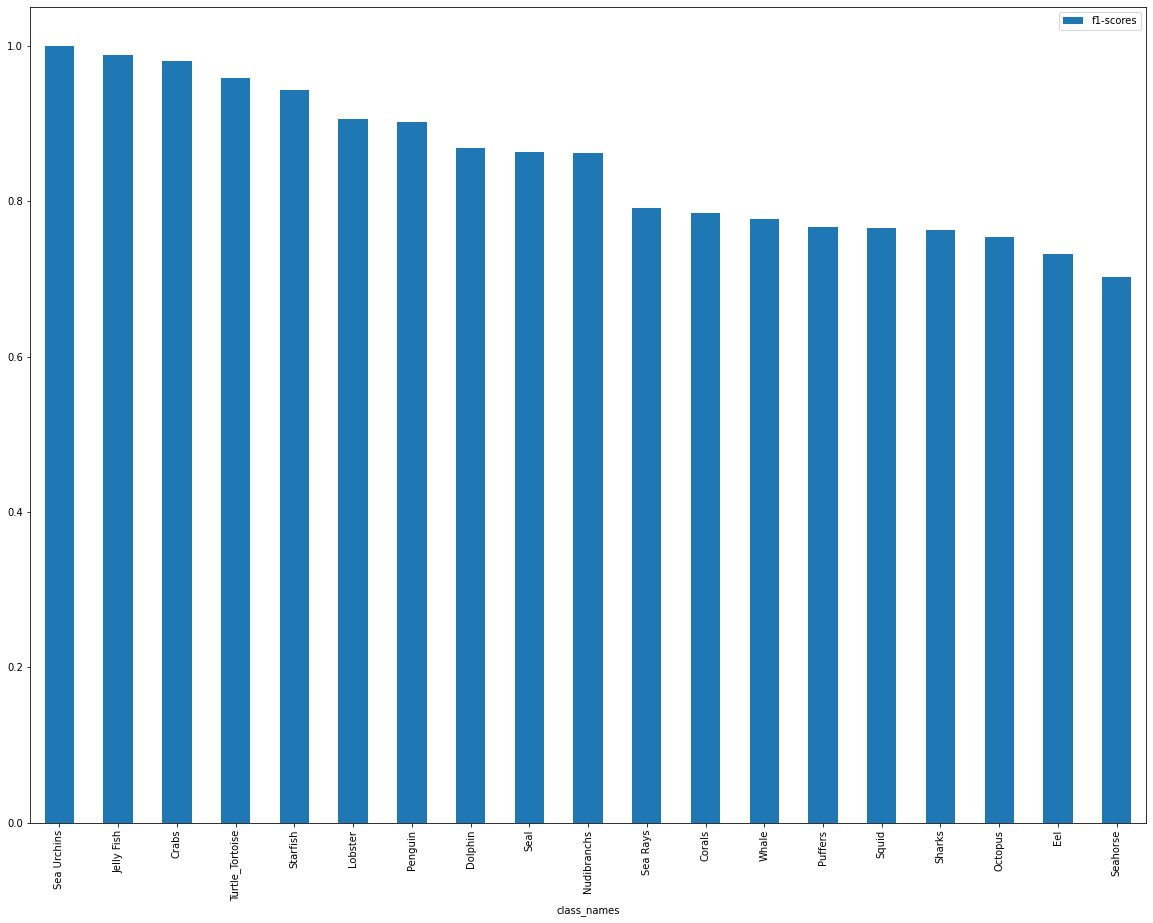

In [69]:
f1_df.plot(kind="bar",x="class_names",y="f1-scores",figsize=(20,15))

In [70]:
def load_and_prep_image(filename, img_shape=(224,224),scale=True):
  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image,channels=3)
  image = tf.image.resize(image,size=img_shape)
  if scale:
    image = image/255
  return image  

1/1 [==============================] - 0s 24ms/step


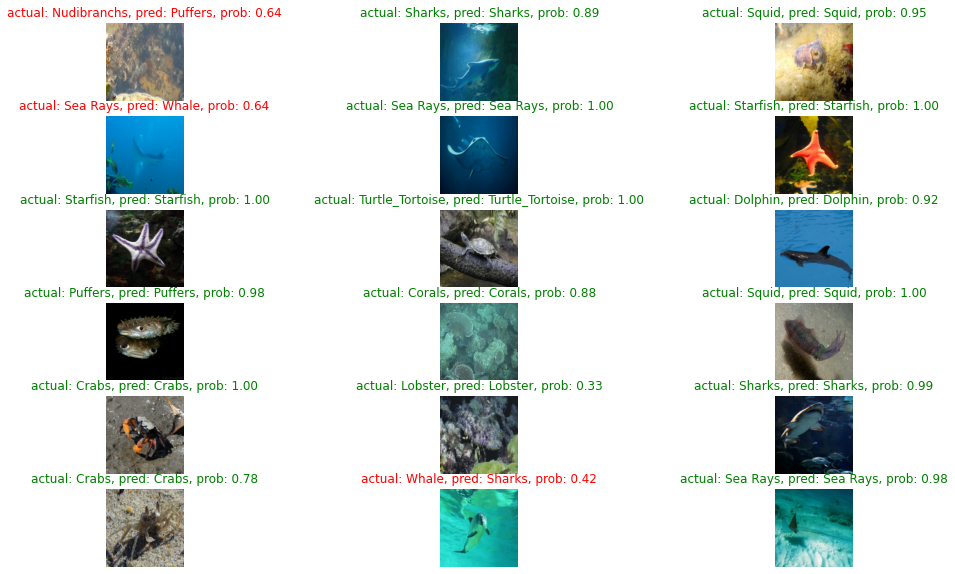

In [77]:
plt.figure(figsize=(17, 10))
for i in range (18):
  random_class = random.choice(class_names)
  image_name = random.choice(os.listdir("sea_animals"+"/"+random_class))
  filepath = "sea_animals" + "/" + random_class +"/" + image_name
  image = load_and_prep_image(filepath,scale=False)
  pred_probs = fine_tuned_model.predict(tf.expand_dims(image,axis=0))
  pred_class = train_data.class_names[pred_probs.argmax()]
  plt.subplot(6, 3, i+1)
  plt.imshow(image/255)
  if random_class == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {random_class}, pred: {pred_class}, prob: {pred_probs.max():.2f}", c=title_color)
  plt.axis(False);